table of contents  
1. Prepare  
2. Dataset Reading, and Preprocess  
3. Calc Pitch Control Impact, and visualize

# Prepare

## Import Library

In [1]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Define Static Parameter

In [2]:
base_dir = os.path.join('..')
fig_dir = os.path.join(base_dir, 'reports', 'figure')

sys.path.append(os.path.join(base_dir, 'scripts'))
import Metrica_PitchControl as mpc
from PlayerPitchControlAnalysis import PlayerPitchControlAnalysisPlayer

In [3]:
cmap_dict = {'yellow':'autumn', 'lightgray':'binary', 'white':'binary', 'darkred':'Reds', 'purple':'Purples', 'cyan':'Blues', 'blue':'Blues', 'red':'Reds', 'black':'binary'}

# Dataset Reading, and Preprocess

In [4]:
data_dir = os.path.join(base_dir, 'datasets', 'preprocessed')
play_list = os.listdir(data_dir)
print(play_list)

['Fulham 0 - [1] Liverpool', 'Genk 0 - [3] Liverpool', '.DS_Store', 'Bayern 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool', 'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Everton', 'Liverpool [3] - 0 Bournemouth', 'Liverpool [1] - 0 Wolves', 'Liverpool [2] - 1 Chelsea', 'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 0 Porto', 'Liverpool [2] - 0 Everton', 'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg', 'Liverpool [2] - 0 Man City', 'Liverpool [1] - 0 Watford', 'Leicester 0 - [3] Liverpool', 'Liverpool [4] - 0 Barcelona', 'Porto 0 - [2] Liverpool']


In [5]:
play = 'Liverpool [2] - 1 Chelsea'
data_dir_tmp = os.path.join(data_dir, play)
df_dict, color_dict = {}, {}
for infile in os.listdir(data_dir_tmp):
    if not infile.startswith('events.'):
        team, color = infile.replace('.csv','').split('_')
        df_dict[team] = pd.read_csv(os.path.join(data_dir_tmp, infile), index_col=[0])
        color_dict[team] = color
events_df = pd.read_csv(os.path.join(data_dir_tmp, 'events.csv'))

## preprocess, get ball df

In [6]:
ball_c_list = [f'ball_{c}' for c in ['x', 'y']]
for team, df in df_dict.items():
    print(team)
    ball_df = df[ball_c_list]
    
    # remove ball columns
    # df.drop(columns=ball_c_list, inplace=True)

    # get player idx
    mst_df = df[['Time [s]']+ball_c_list]
    pid_array = np.unique([c.split('_')[0] for c in df.columns if not c in ['Time [s]']+ball_c_list])
    
    # filter columns
    c_list = np.array([[f'{pid}_x', f'{pid}_y', f'{pid}_vx', f'{pid}_vy'] for pid in pid_array]).flatten().flatten().tolist()
    df = df[c_list]

    # rename columns
    df.columns = [f'{team}_{c}' for c in df.columns]
    
    # merge
    df = pd.merge(df, mst_df, on=['frame'])

    df_dict[team] = df

Chelsea
Liverpool


In [7]:
for k, df in df_dict.items():
    print(k)
    print(np.unique([c.split('_')[1] for c in df.columns if c.startswith(k.split('_')[0])]).tolist())
    display(df.head())

Chelsea
['11069', '14238', '24075', '24076', '3342', '3343', '3344', '3346', '3347', '9949']


,Chelsea_11069_x,Chelsea_11069_y,Chelsea_11069_vx,Chelsea_11069_vy,Chelsea_14238_x,Chelsea_14238_y,Chelsea_14238_vx,Chelsea_14238_vy,Chelsea_24075_x,Chelsea_24075_y,...,Chelsea_3347_y,Chelsea_3347_vx,Chelsea_3347_vy,Chelsea_9949_x,Chelsea_9949_y,Chelsea_9949_vx,Chelsea_9949_vy,Time [s],ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
0,10.946825,-3.497184,NaN,NaN,51.434932,2.072757,NaN,NaN,3.677551,-11.857143,...,-23.714286,NaN,NaN,10.290292,24.187534,NaN,NaN,0.00,7.434636,32.458994
1,10.980321,-3.462608,NaN,NaN,51.434969,2.072870,NaN,NaN,3.694928,-11.874356,...,-23.609570,NaN,NaN,10.331091,24.260899,NaN,NaN,0.05,7.559493,32.429260
2,11.007433,-3.429016,NaN,NaN,51.434998,2.072960,NaN,NaN,3.710945,-11.890222,...,-23.509787,NaN,NaN,10.358088,24.326359,NaN,NaN,0.10,7.668399,32.391610
3,11.028628,-3.396337,NaN,NaN,51.435021,2.073029,NaN,NaN,3.725656,-11.904794,...,-23.414574,NaN,NaN,10.372278,24.384216,NaN,NaN,0.15,7.762309,32.346479
4,11.044373,-3.364498,0.333591,0.639659,51.435037,2.073078,0.000344,0.001053,3.739111,-11.918123,...,-23.323572,1.204912,1.834486,10.374654,24.434775,0.087282,1.023331,0.20,7.842176,32.294301


Liverpool
['10', '11', '12', '14', '22035', '22036', '24074', '3', '5', '9']


,Liverpool_10_x,Liverpool_10_y,Liverpool_10_vx,Liverpool_10_vy,Liverpool_11_x,Liverpool_11_y,Liverpool_11_vx,Liverpool_11_vy,Liverpool_12_x,Liverpool_12_y,...,Liverpool_5_y,Liverpool_5_vx,Liverpool_5_vy,Liverpool_9_x,Liverpool_9_y,Liverpool_9_vx,Liverpool_9_vy,Time [s],ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
0,14.100680,26.390498,NaN,NaN,20.406803,-6.428571,NaN,NaN,5.380653,31.652456,...,33.422002,NaN,NaN,21.318011,14.896547,NaN,NaN,0.00,7.434636,32.458994
1,14.051092,26.501986,NaN,NaN,20.464635,-6.403893,NaN,NaN,5.590719,31.657852,...,33.401566,NaN,NaN,21.360648,14.996479,NaN,NaN,0.05,7.559493,32.429260
2,13.997512,26.613551,NaN,NaN,20.518929,-6.380499,NaN,NaN,5.787612,31.658937,...,33.383574,NaN,NaN,21.391852,15.089035,NaN,NaN,0.10,7.668399,32.391610
3,13.940436,26.725034,NaN,NaN,20.569807,-6.358349,NaN,NaN,5.971762,31.655926,...,33.367849,NaN,NaN,21.412239,15.174538,NaN,NaN,0.15,7.762309,32.346479
4,13.880365,26.836272,-1.181462,2.218314,20.617390,-6.337403,0.956543,0.420532,6.143599,31.649035,...,33.354211,-0.034606,-0.27992,21.422426,15.253309,0.228416,1.588301,0.20,7.842176,32.294301


In [8]:
events_df.head()

,Team,Start Frame,End Frame,Start X,Start Y,End X,End Y,From,To
0,attack,82,142,23.018837,27.276658,49.913961,19.212369,10,9
1,attack,142,162,49.913961,19.212369,41.454506,7.917003,9,10


In [9]:
events_df['Team'] = 'Liverpool'

# Calc Pitch Control Impact, and visualize

In [10]:
params = mpc.default_model_params(3)

## set start, end

## region Filmino analysis

In [11]:
example_player_analysis_away = PlayerPitchControlAnalysisPlayer(
    df_dict=df_dict,
    params=params,
    events=events_df,
    event_id=0,
    team_player_to_analyze='Liverpool',
    player_to_analyze=9,
    field_dimens=(106.0, 68.0),
    n_grid_cells_x=50,
)

In [12]:
# First, let's look at the amount of space the player created with his/her off ball run
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " created "
    + str(
        int(
            example_player_analysis_away.calculate_space_created(
                replace_function="movement", replace_x_velocity=0, replace_y_velocity=0
            )
        )
    )
    + " m^2 of space with his movement during event "
    + str(example_player_analysis_away.event_id)
)

Liverpool Player 9 created 150 m^2 of space with his movement during event 0


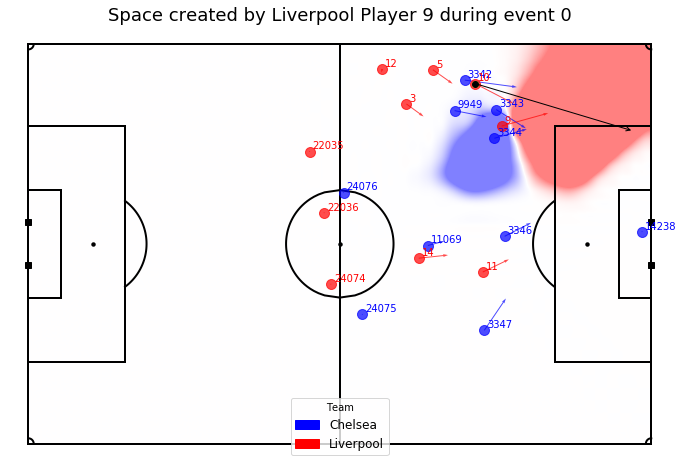

In [13]:
# Now, let's plot the space created and conceded by his run
example_player_analysis_away.plot_pitch_control_difference(
    replace_function="movement", replace_x_velocity=0, replace_y_velocity=0, team_color_dict=color_dict
)

In [14]:
# Let's look at the space the player is gaining by being on the right wing
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " occupied "
    + str(
        int(
            example_player_analysis_away.calculate_space_created(
                replace_function="presence"
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_away.event_id)
)

Liverpool Player 9 occupied 229 m^2 of space during event 0


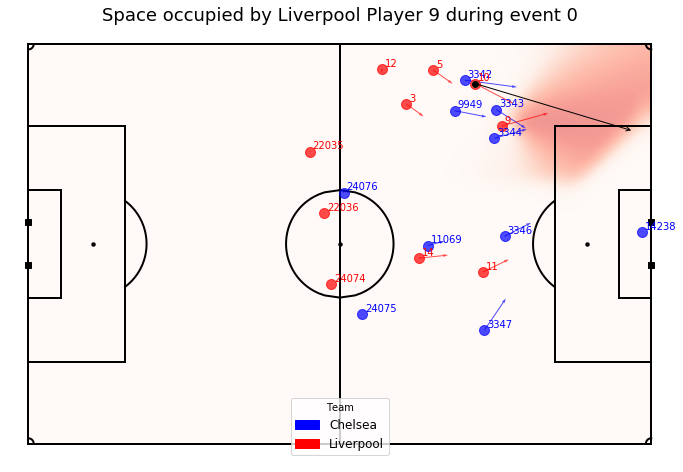

In [15]:
example_player_analysis_away.plot_pitch_control_difference(replace_function="presence", team_color_dict=color_dict)

In [16]:
# Finally, let's examine what would happen if we moved the player 10 meters towards the middle of the pitch
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " would have occupied a difference of "
    + str(
        int(
            -1
            * example_player_analysis_away.calculate_space_created(
                replace_function="location", relative_x_change=-2, relative_y_change=-2
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_away.event_id)
    + " if they were 10 meters towards the center of the pitch"
)

Liverpool Player 9 would have occupied a difference of -141 m^2 of space during event 0 if they were 10 meters towards the center of the pitch


Plotting new location


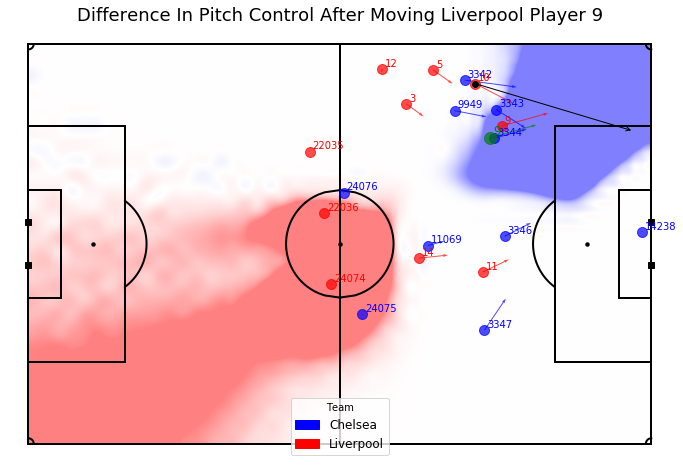

In [17]:
example_player_analysis_away.plot_pitch_control_difference(
    replace_function="location", relative_x_change=-2, relative_y_change=-2, team_color_dict=color_dict
)